In [60]:
# installer la bibliothèque UMAP
!pip install umap-learn

In [65]:
# Importation des bibliothèques

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from umap import UMAP
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [66]:
# Préparer la donnée
df = pd.read_csv('/content/naturalness_index_by_site.csv')
# df_layer1 = df[df["LAYER"] == 1]

# Ne garder que les valeurs numériques
df_layer1 = df.drop(['CODE_TRANS', 'LAYER'], axis = 1)

# Afficher le dataframe
print(df_layer1)

# Normaliser les données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_layer1)

     mean_naturalness_100  std_naturalness_100  median_naturalness_100  \
0              148.062500            48.909954                   185.0   
1              149.437500            38.855130                   154.0   
2              185.025316            13.866429                   185.0   
3              170.129870             7.685964                   169.0   
4              173.128205            15.538504                   169.0   
..                    ...                  ...                     ...   
587            589.435897            10.803121                   590.0   
588            551.935065             3.971776                   551.0   
589            583.310811            26.099563                   577.5   
590            543.987342             7.873194                   549.0   
591            506.324675            82.710643                   534.0   

     mean_naturalness_250  std_naturalness_250  median_naturalness_250  \
0              171.037190            

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

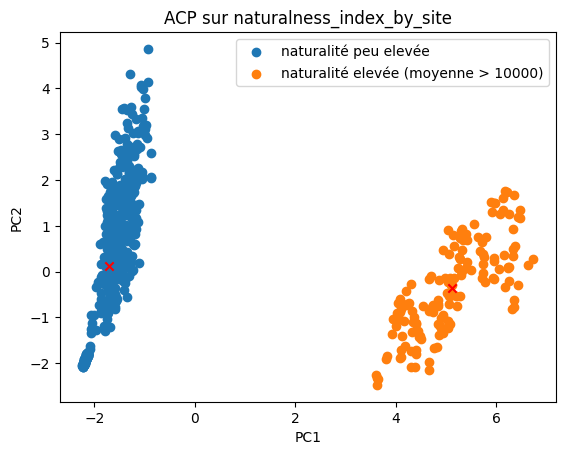

In [69]:
# Faire l'ACP
pca = PCA(n_components=2)  # Ne garder que deux composantes
principal_components = pca.fit_transform(scaled_data)

# Nouveau dataframe avec les données réduites à la dimension 2
df_reduit = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# K_Means pour regrouper les données
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_reduit)

# obtenir le centre des clusters et labéliser les points
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

# Comment le tableau a été labellisé
print(cluster_labels)

# donner un sens aux labels
moins_naturel = cluster_labels[0]
plus_naturel = cluster_labels[148]
print(moins_naturel != plus_naturel)

# Afficher les données dans le nouvel espace
# plt.scatter(df_reduit['PC1'], df_reduit['PC2'], c=cluster_labels, cmap='viridis')
plt.scatter(df_reduit['PC1'][cluster_labels == moins_naturel], df_reduit['PC2'][cluster_labels == moins_naturel], label=f'naturalité peu elevée')
plt.scatter(df_reduit['PC1'][cluster_labels == plus_naturel], df_reduit['PC2'][cluster_labels == plus_naturel], label=f'naturalité elevée (moyenne > 10000)')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', c='red')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('ACP sur naturalness_index_by_site')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

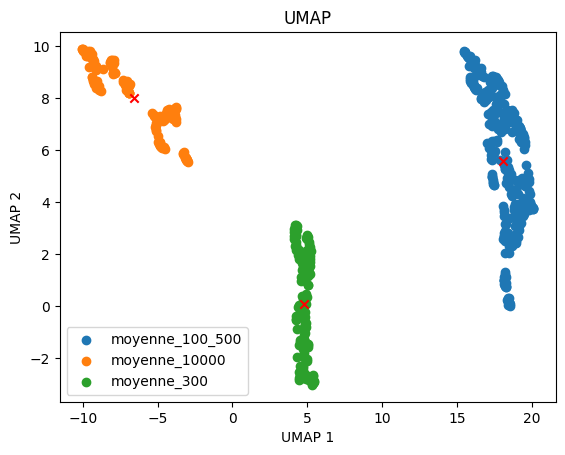

In [73]:
# Faire le UMAP
umap = UMAP(n_components=2)
umap_result = umap.fit_transform(scaled_data)

# K_Means pour regrouper les données
kmeans_UMAP = KMeans(n_clusters=3)
kmeans_UMAP.fit(umap_result)

# obtenir le centre des clusters et labeliser les points
cluster_centers = kmeans_UMAP.cluster_centers_
cluster_labels = kmeans_UMAP.labels_

# Comment le tableau a été labélisé
print(cluster_labels)

# donner un sens aux labels
moyenne_100_500 = cluster_labels[0]
moyenne_10000 = cluster_labels[148]
moyenne_300 = cluster_labels[296]
print(moyenne_100_500)
print(moyenne_10000)
print(moyenne_300)

# Step 4: Visualize the result
# plt.scatter(umap_result[:, 0], umap_result[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(umap_result[:, 0][cluster_labels == moyenne_100_500], umap_result[:, 1][cluster_labels == moyenne_100_500], label=f'moyenne_100_500')
plt.scatter(umap_result[:, 0][cluster_labels == moyenne_10000],  umap_result[:, 1][cluster_labels == moyenne_10000], label=f'moyenne_10000')
plt.scatter(umap_result[:, 0][cluster_labels == moyenne_300],  umap_result[:, 1][cluster_labels == moyenne_300], label=f'moyenne_300')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', c='red')
plt.title('UMAP')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

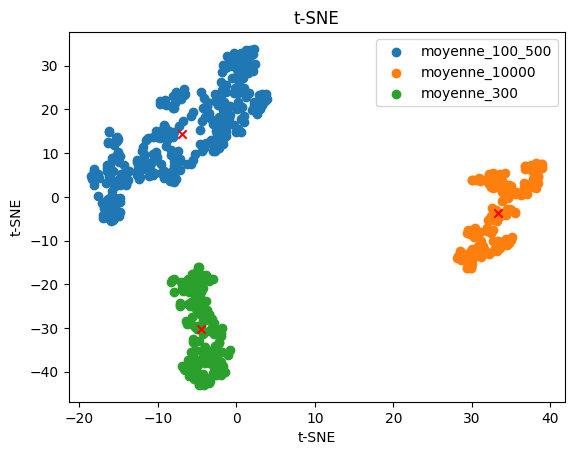

In [77]:
# faire le t-SNE
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(scaled_data)

# K_Means pour regrouper les données
kmeans_tsne = KMeans(n_clusters=3)
kmeans_tsne.fit(tsne_result)

# obtenir le centre des clusters et labeliser les points
cluster_centers = kmeans_tsne.cluster_centers_
cluster_labels = kmeans_tsne.labels_

# Comment le tableau a été labélisé
print(cluster_labels)

# donner un sens aux labels
moyenne_100_500 = cluster_labels[0]
moyenne_10000 = cluster_labels[148]
moyenne_300 = cluster_labels[296]
print(moyenne_100_500)
print(moyenne_10000)
print(moyenne_300)

# Step 4: Visualize the result
# plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(tsne_result[:, 0][cluster_labels == moyenne_100_500], tsne_result[:, 1][cluster_labels == moyenne_100_500], label=f'moyenne_100_500')
plt.scatter(tsne_result[:, 0][cluster_labels == moyenne_10000],  tsne_result[:, 1][cluster_labels == moyenne_10000], label=f'moyenne_10000')
plt.scatter(tsne_result[:, 0][cluster_labels == moyenne_300],  tsne_result[:, 1][cluster_labels == moyenne_300], label=f'moyenne_300')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', c='red')
plt.title('t-SNE')
plt.xlabel('t-SNE')
plt.ylabel('t-SNE')
plt.legend()
plt.show()